In [357]:
import matplotlib.pyplot as plt
import utils
import importlib
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
importlib.reload(utils)
import datetime as dt

* load logs
* pick trips/events
* x-axis are time
* y-axis # of passengers picked up
* text on top of line is explanation or overload bus id

In [405]:
# Load logs
log_file = 'logs/no_inject_bl.log'
# log_file = 'logs/no_inject_mcts.log'
# log_file = 'logs/no_inject_20210507_BL.log'
# log_file = 'logs/no_inject_20210607_all_served_IT200.log'
df = utils.get_bus_df(log_file)
df.got_on_bus.sum(), df.left.sum()

(2264, 6178)

In [387]:
dispatch_df = utils.get_dispatch_df(log_file)
dispatch_df.head(1)

,actual_time,bus_id,from_stop,trip_id,stop_id
0,2021-12-15 08:05:00,41,HICHICNN,263571,MCC4_16


In [388]:
def merge_all_indices(valid_df, all_indices):
    dt_indices = np.unique(np.asarray(all_indices))
    dt_indices = pd.to_datetime(dt_indices) 
    valid_df = valid_df.set_index('actual_time')
    a = pd.DataFrame(index=dt_indices)
    all_indices = valid_df.join(a, how='right').fillna(0)
    return all_indices
    
bus_id = ['1761']
# tdf = df[df['bus_id'].isin(bus_id)]
tdf = df.query("trip_id == '260363'")
dt_indices = df.actual_time.unique().tolist() + dispatch_df.actual_time.unique().tolist()
all_indices = merge_all_indices(tdf, dt_indices)

only_valid = all_indices.query("trip_id == '260363'")
min_time = (only_valid.index.min() - dt.timedelta(minutes=5)).time()
max_time = (only_valid.index.max() - dt.timedelta(minutes=5)).time()
merged_df = all_indices.between_time(min_time, max_time)

/tmp/ipykernel_118921/2494220621.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['reverse_left'] = (tdf['left'] * -1)


2021-12-15 08:05:00


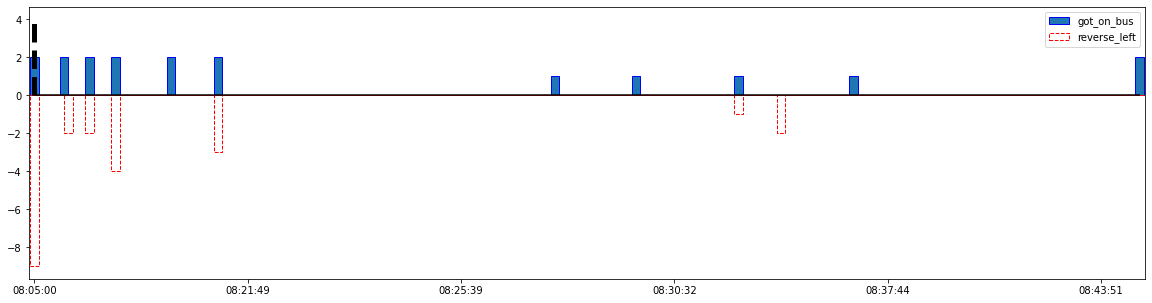

In [389]:
import pandas as pd
TRIP_ID = '263571'

tdf = df.query(f"trip_id == '{TRIP_ID}'").query("overload_id == 0")
dt_indices = df.actual_time.unique().tolist() + dispatch_df.actual_time.unique().tolist()
all_indices = merge_all_indices(tdf, dt_indices)

only_valid = all_indices.query(f"trip_id == '{TRIP_ID}'")
min_time = (only_valid.index.min() - dt.timedelta(minutes=5)).time()
max_time = (only_valid.index.max() - dt.timedelta(minutes=5)).time()
merged_df = all_indices.between_time(min_time, max_time)


tdf = merged_df
ax = tdf.plot(kind='bar', y='got_on_bus', style='o', figsize=(20, 5), rot=0, edgecolor='blue', width=2.0, linestyle="-", alpha=1.0)
tdf['reverse_left'] = (tdf['left'] * -1)
tdf.plot(kind='bar', y='reverse_left', style='o', rot=0, edgecolor='red', width=2.0, linestyle="--", ax=ax, fill=False)
# ax.axhline(0, 10000)
ax.hlines(0, tdf.index.argmin(), tdf.index.argmax(), color='black', ls='-')

overloads = ['41']
for overload in overloads:
    # adf = dispatch_df[dispatch_df['bus_id'].isin([overload])].query(f"trip_id == '{TRIP_ID}'")
    adf = dispatch_df.query(f"trip_id == '{TRIP_ID}'")
    adf = merge_all_indices(adf, dt_indices)
    adf = adf.query("bus_id != 0").between_time(tdf.index.min().time(), tdf.index.max().time())
    for k, v in adf.iterrows():
        print(k)
        ax.vlines(merged_df.index.get_loc(k), 0, 4, ls='--', linewidth=5, color='black')

ax.set_xticklabels([pandas_datetime.strftime("%H:%M:%S") for pandas_datetime in tdf.index])
# myFmt = mdates.DateFormatter('%H:%M:%S')
# ax.xaxis.set_major_formatter(myFmt)

loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
fp = 'plots/1.png'

plt.savefig(fp, dpi=200)
plt.show()

/tmp/ipykernel_118921/2179780870.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['reverse_left'] = (tdf['left'] * -1)


2021-12-15 11:09:00


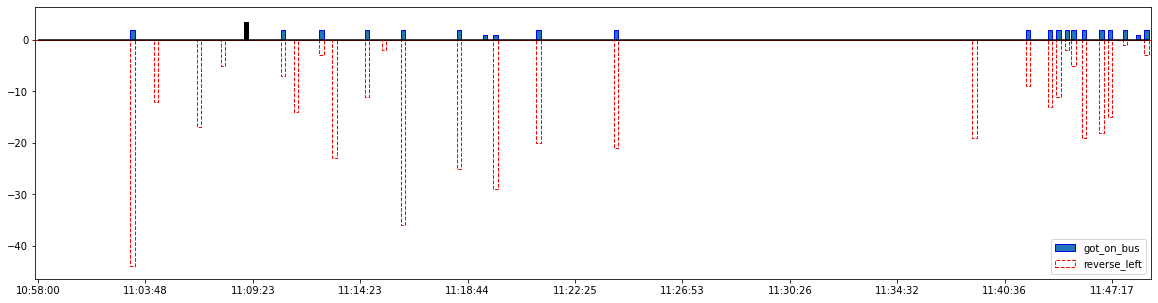

/tmp/ipykernel_118921/2179780870.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['reverse_left'] = (tdf['left'] * -1)


2021-12-15 11:09:00


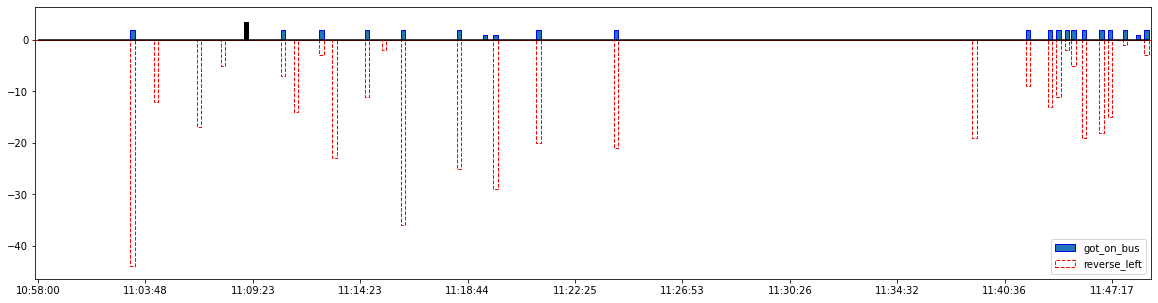

In [394]:
log_files = ['logs/no_inject_bl.log', 'logs/no_inject_mcts.log']
TRIP_ID = '260367'

for i, log in enumerate(log_files):
    # Load logs
    df = utils.get_bus_df(log_file)
    dispatch_df = utils.get_dispatch_df(log_file)

    tdf = df.query(f"trip_id == '{TRIP_ID}'").query("overload_id == 0")
    dt_indices = df.actual_time.unique().tolist() + dispatch_df.actual_time.unique().tolist()
    all_indices = merge_all_indices(tdf, dt_indices)

    only_valid = all_indices.query(f"trip_id == '{TRIP_ID}'")
    min_time = (only_valid.index.min() - dt.timedelta(minutes=5)).time()
    max_time = (only_valid.index.max() - dt.timedelta(minutes=5)).time()
    merged_df = all_indices.between_time(min_time, max_time)


    tdf = merged_df
    ax = tdf.plot(kind='bar', y='got_on_bus', style='o', figsize=(20, 5), rot=0, edgecolor='blue', width=2.0, linestyle="-", alpha=1.0)
    tdf['reverse_left'] = (tdf['left'] * -1)
    tdf.plot(kind='bar', y='reverse_left', style='o', rot=0, edgecolor='red', width=2.0, linestyle="--", ax=ax, fill=False)
    # ax.axhline(0, 10000)
    ax.hlines(0, tdf.index.argmin(), tdf.index.argmax(), color='black', ls='-')

    overloads = ['41']
    for overload in overloads:
        # adf = dispatch_df[dispatch_df['bus_id'].isin([overload])].query(f"trip_id == '{TRIP_ID}'")
        adf = dispatch_df.query(f"trip_id == '{TRIP_ID}'")
        adf = merge_all_indices(adf, dt_indices)
        adf = adf.query("bus_id != 0").between_time(tdf.index.min().time(), tdf.index.max().time())
        for k, v in adf.iterrows():
            print(k)
            ax.vlines(merged_df.index.get_loc(k), 0, 4, ls='--', linewidth=5, color='black')

    ax.set_xticklabels([pandas_datetime.strftime("%H:%M:%S") for pandas_datetime in tdf.index])
    # myFmt = mdates.DateFormatter('%H:%M:%S')
    # ax.xaxis.set_major_formatter(myFmt)

    loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    fp = f'plots/{i+1}.png'

    plt.savefig(fp, dpi=200)
    plt.show()

In [396]:
dispatch_df

,actual_time,bus_id,from_stop,trip_id,stop_id
0,2021-12-15 08:05:00,41,HICHICNN,263571,MCC4_16
1,2021-12-15 08:05:00,42,MCC5_1,262669,MCC4_19
2,2021-12-15 08:15:00,43,WESWILEN,261860,MCC5_6
3,2021-12-15 08:15:00,44,MCC5_1,259285,MCC4_20
4,2021-12-15 08:19:52,45,MCC5_1,261584,WOO5SEN
5,2021-12-15 08:35:00,44,ROWBUESN,263116,MCC4_15
6,2021-12-15 08:35:00,43,26ACLANN,262786,OLDHICEN
7,2021-12-15 08:43:17,45,GXOGREEN,259292,HAMFLIWN
8,2021-12-15 08:48:40,42,HAREZEEN,261850,PON10AEM
9,2021-12-15 08:56:00,41,GXIRIVEF,261647,ARDMcGSW
